In [132]:
!pip install pandas
!pip install --upgrade openpyxl
!pip install seaborn
!pip install matplotlib
!pip install StandardScaler

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [134]:
file=pd.read_excel(r"./input/SampleData.xlsx")

In [135]:
df=pd.DataFrame(file)
df.columns=df.columns.str.strip().str.lower()
df.rename(columns={
    'customerid':'customer_id',
    'invoiceid':'invoice_id',
    'finalamount': 'final_amount',
    'joindate': 'join_date',
    'visitdate': 'visit_date',
    'productid':'product_id',
    'productprice':'product_price',
    'totalspent':'total_spent',
    'paymentmethod ':'payment_method',
    'membershipstatus':'membership_status',
    'customername':'customer_name'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unnamed: 0         4000 non-null   int64         
 1   invoice_id         4000 non-null   object        
 2   customer_id        4000 non-null   object        
 3   customer_name      4000 non-null   object        
 4   age                3915 non-null   float64       
 5   gender             3949 non-null   object        
 6   join_date          3871 non-null   datetime64[ns]
 7   visit_date         4000 non-null   datetime64[ns]
 8   region             3953 non-null   object        
 9   category           4000 non-null   object        
 10  product_id         4000 non-null   object        
 11  product_price      4000 non-null   float64       
 12  quantity           4000 non-null   int64         
 13  total_spent        4000 non-null   float64       
 14  discount

In [136]:
df.isnull().sum()

unnamed: 0              0
invoice_id              0
customer_id             0
customer_name           0
age                    85
gender                 51
join_date             129
visit_date              0
region                 47
category                0
product_id              0
product_price           0
quantity                0
total_spent             0
discount                0
final_amount            0
paymentmethod           0
membership_status    1580
email                 198
phone                 181
dtype: int64

In [137]:
df['age'] = df['age'].fillna(df['age'].median())
df['gender']=df['gender'].fillna('Not mentioned')
df['join_date']=df['join_date'].fillna(df['visit_date'])
df['region']=df['region'].fillna('Not mentioned')
df['membership_status']=df['membership_status'].fillna('Not given')
df['email']=df['email'].fillna('@gmail.com')
df['phone']=df['phone'].fillna('0000000000')
df['average_spending']=df['final_amount']/df['quantity']

## Perform Exploratory Data Analysis (EDA)

Age

In [138]:
bins=[17,25,35,45,55,60,100]
lables=['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['age_group']=pd.cut(df['age'],bins=bins, labels=lables)
age_spending = df.groupby('age_group', observed=False)['final_amount'].mean().sort_values(ascending=False).round(2)
age_spending

age_group
18-25    14951.85
26-35    14302.40
60+      13965.98
36-45    13413.10
46-60    13177.18
<18      12635.42
Name: final_amount, dtype: float64

C:\Users\kanis\AppData\Local\Temp\ipykernel_9188\1635748780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_spending.index, y=age_spending.values, palette="viridis")


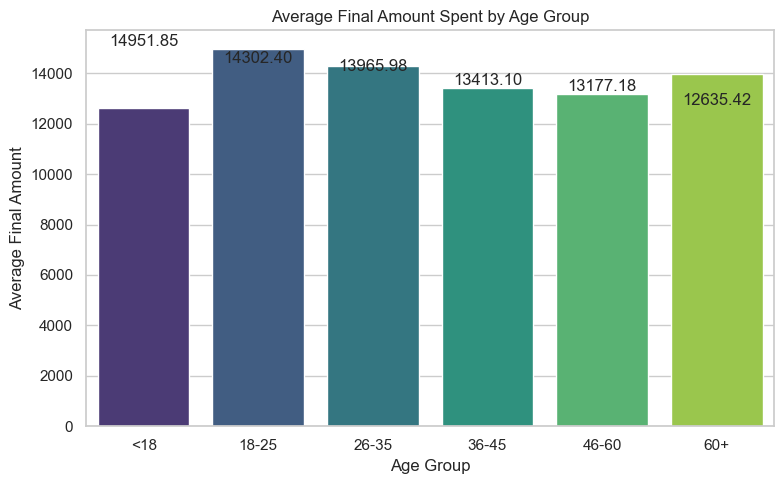

In [139]:
plt.figure(figsize=(8, 5))
sns.barplot(x=age_spending.index, y=age_spending.values, palette="viridis")
plt.title("Average Final Amount Spent by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Final Amount")
for i, value in enumerate(age_spending.values):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show() 

Gender

In [140]:
df['age_group'].isnull().sum()
# df['gender'].value_counts()

np.int64(0)

In [141]:
gender_spending=df.groupby('gender')['final_amount'].mean().sort_values(ascending=False).round(2)
gender_spending

gender
Other            14411.71
Female           13584.29
Male             13572.19
Not mentioned    13250.02
Name: final_amount, dtype: float64

Region

In [142]:
df['region'].value_counts()

region
North            1008
South             990
West              981
East              974
Not mentioned      47
Name: count, dtype: int64

In [143]:
region_spending=df[(~df['region'].str.strip().str.lower().eq('not mentioned'))].groupby('region')['final_amount'].mean().sort_values(ascending=False).round(2)
# region_spending = df.groupby('region')['final_amount'].agg(['mean', 'sum', 'count']).sort_values(by='sum', ascending=False)
region_spending

region
North    14272.17
East     13990.59
South    13694.89
West     13386.45
Name: final_amount, dtype: float64

Top spending customers

In [144]:
top_customers=df.groupby(['customer_id','customer_name'])['final_amount'].sum().sort_values(ascending=False).head(10)
top_customers

customer_id  customer_name   
CUST7916     Matthew Murray      49703.80
CUST6853     Kelly Soto          49415.15
CUST7272     Marisa Ramirez      49360.95
CUST4623     Kathryn Vaughn      49233.30
CUST9144     Shawn Haney         49023.65
CUST8657     Kimberly Gross      48789.20
CUST6930     Bruce Paul          48668.15
CUST8360     Maxwell Goodwin     48455.55
CUST9727     Curtis Henderson    48043.50
CUST4559     Tracy Bean          47782.05
Name: final_amount, dtype: float64

Top spending memebership

In [145]:
top_customers = top_customers.reset_index()
top_customers.to_excel('top_customers.xlsx',index=False,engine='openpyxl')

In [146]:
top_spending_membership=(df[(~df['membership_status'].str.strip().str.lower().eq('not given'))].groupby('membership_status')['final_amount'].sum().sort_values(ascending=False))
top_spending_membership

membership_status
Silver      1.140081e+07
Platinum    1.127654e+07
Gold        1.081698e+07
Name: final_amount, dtype: float64

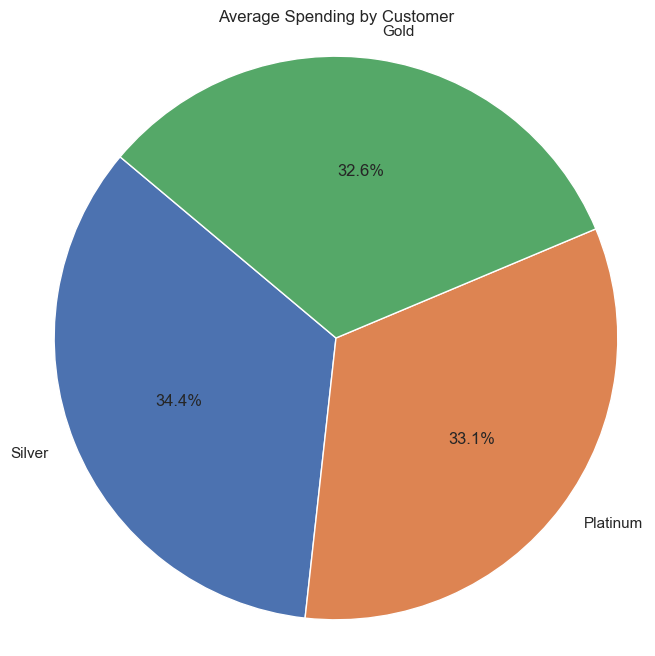

In [147]:
top_membership=(df[(~df['membership_status'].str.strip().str.lower().eq('not given'))].groupby('membership_status')['final_amount'].mean().sort_values(ascending=False))
top_membership.reset_index()
plt.figure(figsize=(8,8))
plt.pie(top_membership.values,labels=top_membership.index,autopct='%1.1f%%',startangle=140)
plt.title('Average Spending by Customer')
plt.axis('equal')  
plt.show()

In [148]:
membership_age = df[~df['membership_status'].str.strip().str.lower().eq('not given')].groupby(['age_group', 'membership_status'],observed=True)['membership_status'].count() .sort_values(ascending=False)
membership_age

age_group  membership_status
60+        Platinum             169
26-35      Platinum             169
18-25      Silver               158
26-35      Gold                 157
18-25      Gold                 153
26-35      Silver               152
60+        Gold                 152
18-25      Platinum             149
36-45      Gold                 146
           Silver               144
60+        Silver               143
36-45      Platinum             143
<18        Gold                 130
           Platinum             118
           Silver               112
46-60      Silver                90
           Platinum              73
           Gold                  62
Name: membership_status, dtype: int64

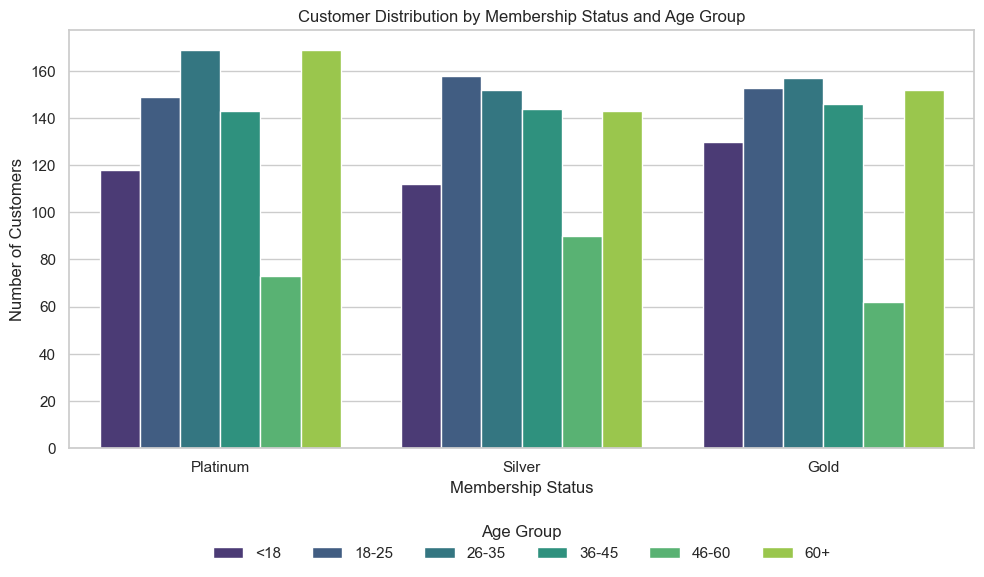

In [149]:
membership_age_df = membership_age.reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=membership_age_df,x='membership_status',y='count',hue='age_group',palette='viridis')
plt.title('Customer Distribution by Membership Status and Age Group')
plt.xlabel('Membership Status')
plt.ylabel('Number of Customers')
plt.legend(title='Age Group', bbox_to_anchor=(0.5, -0.15), loc='upper center',ncol=6,frameon=False)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

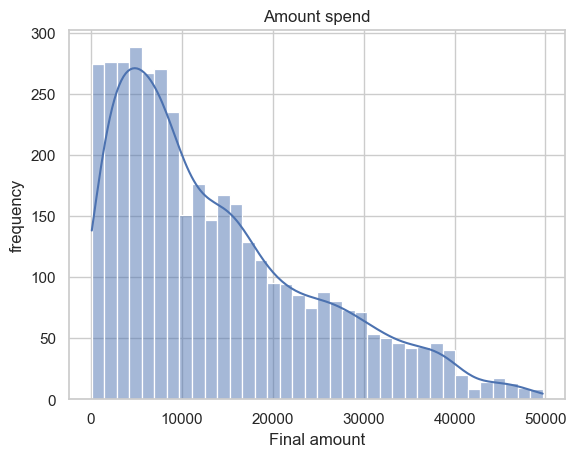

In [150]:
sns.histplot(df['final_amount'],bins=36,kde=True)
plt.title('Amount spend')
plt.xlabel('Final amount')
plt.ylabel('frequency')
plt.show

## Customer Clustering

Cluster customers based on behavioral features such as:
.Frequency of purchase
.Average spending
.Discount usage

In [151]:
behavior=df.groupby(['customer_id','customer_name']).agg({
    'invoice_id':'count',
    'final_amount':'mean',
    'discount':'mean'
    }).rename(columns={
        'invoice_id':'freq_purchase',
        'final_amount':'avg_spend',
        'discount':'avg_discount'}).reset_index().round(2).sort_values(by='freq_purchase',ascending=False)
behavior

,customer_id,customer_name,freq_purchase,avg_spend,avg_discount
292,CUST1577,Mark Daniels,2,17982.91,5.0
3998,CUST9992,Randall King,1,3985.51,0.0
0,CUST1001,Heather Davis,1,17279.61,0.0
1,CUST1001,Matthew Phillips,1,27491.82,0.0
2,CUST1001,Raymond Turner,1,8155.08,15.0
...,...,...,...,...,...
26,CUST1058,Paul Martinez,1,17087.60,0.0
27,CUST1060,Megan Mendez,1,38184.56,0.0
28,CUST1061,Aaron Reid,1,15394.87,5.0
29,CUST1063,Andrew Baker,1,10037.14,10.0


In [152]:
X = behavior[['freq_purchase', 'avg_spend', 'avg_discount']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Apply KMeans Clustering

In [153]:
kmeans = KMeans(n_clusters=4, random_state=42)
behavior['cluster'] = kmeans.fit_predict(X_scaled)

In [154]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 292 to 15
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    3999 non-null   object 
 1   customer_name  3999 non-null   object 
 2   freq_purchase  3999 non-null   int64  
 3   avg_spend      3999 non-null   float64
 4   avg_discount   3999 non-null   float64
 5   cluster        3999 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 203.1+ KB


## Analyze Clusters

In [155]:
summary =behavior.groupby('cluster')[['freq_purchase', 'avg_spend', 'avg_discount']].mean()
summary

,freq_purchase,avg_spend,avg_discount
cluster,,,
0,1.0,9057.260799,15.330751
1,1.0,30981.209300,6.171068
2,2.0,17982.910000,5.000000
3,1.0,9095.080352,1.687371


In [156]:
behavior=behavior.reset_index()
behavior.to_excel('final/Behavior.xlsx',index=False,engine='openpyxl')

In [157]:
summary=summary.reset_index()
summary.to_excel("final/Summary.xlsx",index=False,engine='openpyxl')

In [158]:
df.to_excel("final/destination.xlsx",index=False,engine='openpyxl')